# ICS-435 Assignment 1


In [7]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn dataset and preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

print(" \n libraries imported")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
 
 libraries imported


## 1. Dataset

In [11]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create a DataFrame with dataset
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2. Tasks

### Data Preprocessing

In [14]:
# Partition into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train size: {len(X_train)} samples, Test size: {len(X_test)} samples")

# Scale features using StandardScaler (for KNN — fit on train, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled with StandardScaler. Use X_train_scaled, X_test_scaled for KNN.")

Train size: 455 samples, Test size: 114 samples
Features scaled with StandardScaler. Use X_train_scaled, X_test_scaled for KNN.


### Model Training

In [16]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

KNN
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1-score: 0.9577464788732394
Confusion matrix:
[[40  3]
 [ 3 68]]

Decision Tree
Accuracy: 0.9385964912280702
Precision: 0.9571428571428572
Recall: 0.9436619718309859
F1-score: 0.950354609929078
Confusion matrix:
[[40  3]
 [ 4 67]]

Random Forest
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1-score: 0.9722222222222222
Confusion matrix:
[[40  3]
 [ 1 70]]

=== Performance comparison ===


,Model,Accuracy,Precision,Recall,F1-score
0,KNN,0.947368,0.957746,0.957746,0.957746
1,Decision Tree,0.938596,0.957143,0.943662,0.950355
2,Random Forest,0.964912,0.958904,0.985915,0.972222


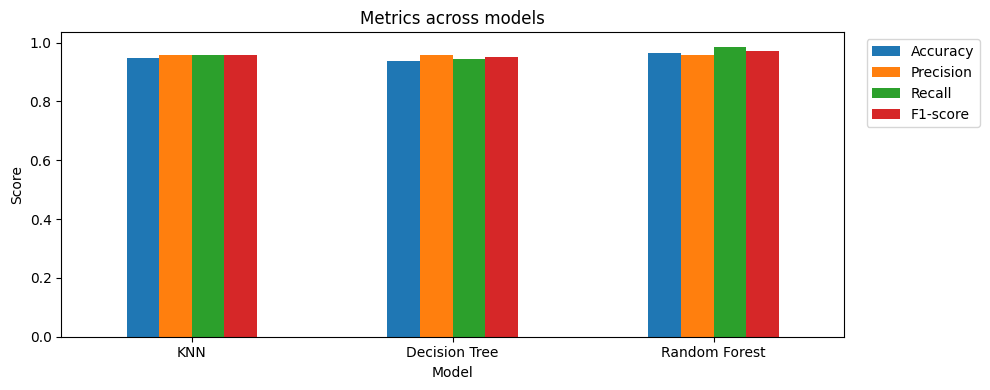

In [20]:
# K-Nearest Neighbors
print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_knn, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_knn, zero_division=0))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Decision Tree
print("\nDecision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_dt, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_dt, zero_division=0))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Random Forest
print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rf, zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_rf, zero_division=0))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Comparison table
results_df = pd.DataFrame({
    "Model": ["KNN", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_knn, zero_division=0), precision_score(y_test, y_pred_dt, zero_division=0), precision_score(y_test, y_pred_rf, zero_division=0)],
    "Recall": [recall_score(y_test, y_pred_knn, zero_division=0), recall_score(y_test, y_pred_dt, zero_division=0), recall_score(y_test, y_pred_rf, zero_division=0)],
    "F1-score": [f1_score(y_test, y_pred_knn, zero_division=0), f1_score(y_test, y_pred_dt, zero_division=0), f1_score(y_test, y_pred_rf, zero_division=0)]
})
print("\n=== Performance comparison ===")
display(results_df)

# Bar chart
results_df.set_index("Model").plot(kind="bar", figsize=(10, 4), rot=0)
plt.title("Metrics across models")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()